importing modules

In [1]:
import os 
import numpy as np # type: ignore
import pandas as pd# type: ignore
from matplotlib import pyplot as plt  # type: ignore

importing data

In [2]:
data_path='data_sets/train.csv'

if os.path.exists(data_path):
    print('file is found')
    print('importing data on progress')
    data=pd.read_csv(data_path)
    print('done importing data')
    
else:
    print('no such file or directory')



data=np.array(data)
m,n=data.shape

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]/255.0

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]/255.0

mx,nx=X_train.shape





file is found
importing data on progress
done importing data


define the activatrion function

In [3]:
def ReLU(Z):
    return np.maximum(Z,0)

def ReLU_prime(Z):
    return Z>0

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

define propagation functions

In [4]:
def params_init():
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def forward_prop(W1,b1,W2,b2,X):
    Z1=W1.dot(X)+b1
    A1=ReLU(Z1)
    Z2=W2.dot(A1)+b2
    A2=softmax(Z2)
    return Z1,A1,Z2,A2

def backward_prop(Z1, A1, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_prime(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def params_update(dW1,db1,dW2,db2,W1,b1,W2,b2,alpha):
    W1=W1-alpha*dW1
    W2=W2-alpha*dW2
    b1=b1-alpha*db1
    b2=b2-alpha*db2
    return W1,b1,W2,b2

Prediction and training

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = params_init()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = params_update(dW1,db1,dW2,db2,W1,b1,W2,b2,alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

Train the model

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)

Iteration:  0
[7 6 7 ... 0 7 7] [1 5 1 ... 7 6 9]
0.0845609756097561
Iteration:  10
[8 6 8 ... 9 5 9] [1 5 1 ... 7 6 9]
0.16251219512195123
Iteration:  20
[8 6 1 ... 9 6 9] [1 5 1 ... 7 6 9]
0.2661951219512195
Iteration:  30
[1 6 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.3524634146341463
Iteration:  40
[1 6 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.41353658536585364
Iteration:  50
[1 6 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.4607317073170732
Iteration:  60
[1 6 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.49926829268292683
Iteration:  70
[1 6 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.5316829268292683
Iteration:  80
[1 6 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.5577560975609757
Iteration:  90
[1 6 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.579780487804878
Iteration:  100
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.5988536585365853
Iteration:  110
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6157560975609756
Iteration:  120
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6321463414634146
Iteration:  130
[1 8 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6463170731707317
Iteration:  140

functions to test the model

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2): # test on testing data
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Test the model

Prediction:  [9]
Label:  9


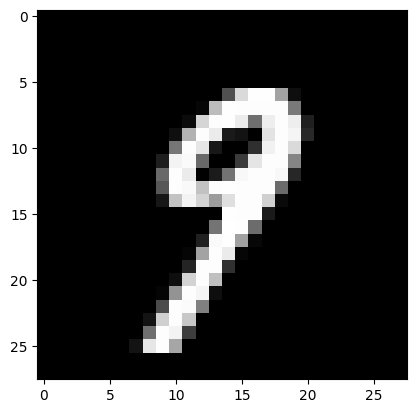

Prediction:  [9]
Label:  9


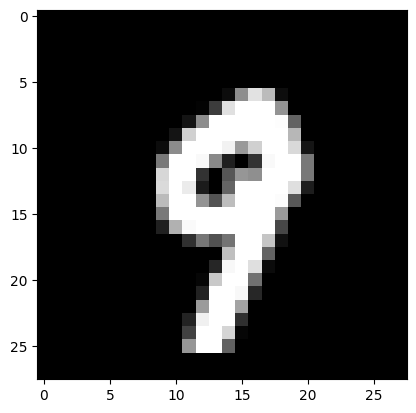

Prediction:  [7]
Label:  7


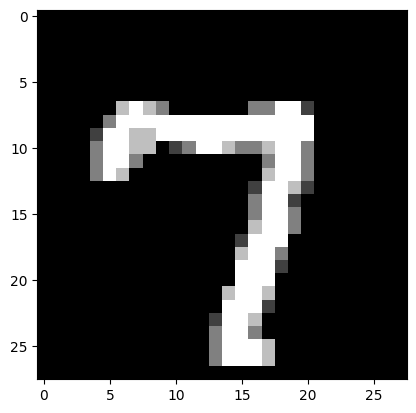

Prediction:  [8]
Label:  8


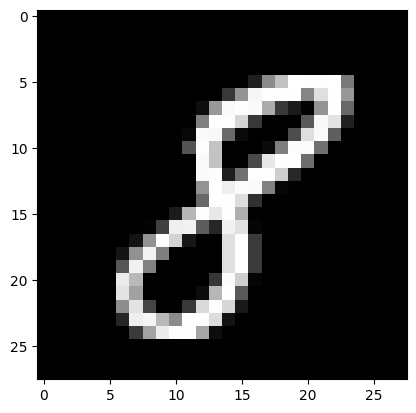

Prediction:  [9]
Label:  9


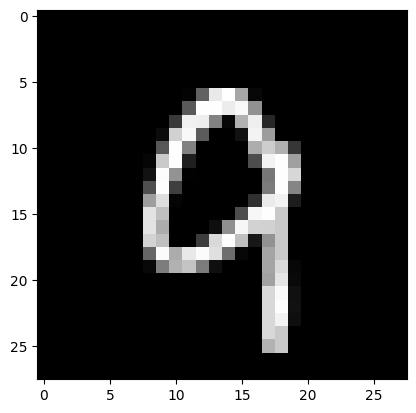

Prediction:  [4]
Label:  4


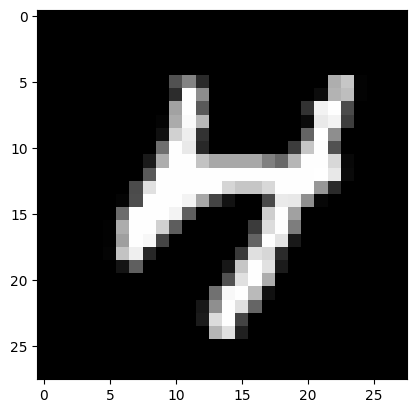

Prediction:  [9]
Label:  9


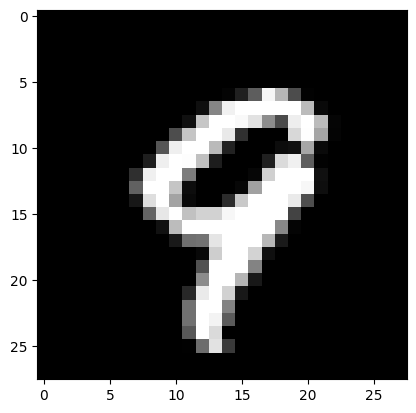

Prediction:  [6]
Label:  2


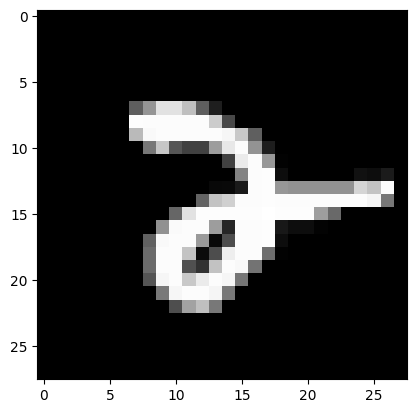

Prediction:  [1]
Label:  1


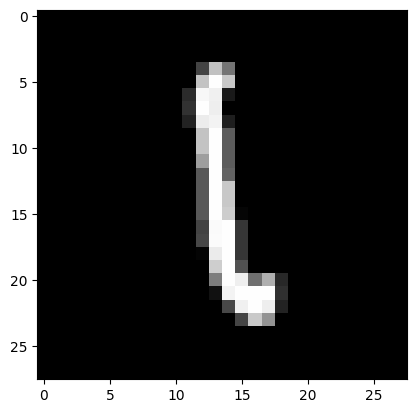

Prediction:  [3]
Label:  3


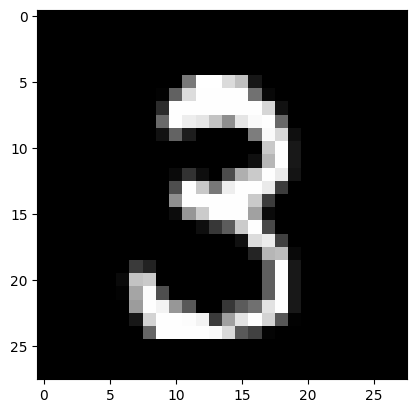

Prediction:  [1]
Label:  1


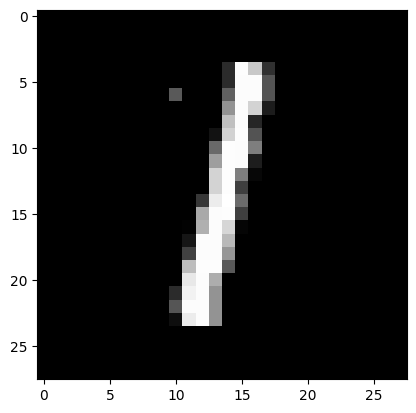

Prediction:  [1]
Label:  1


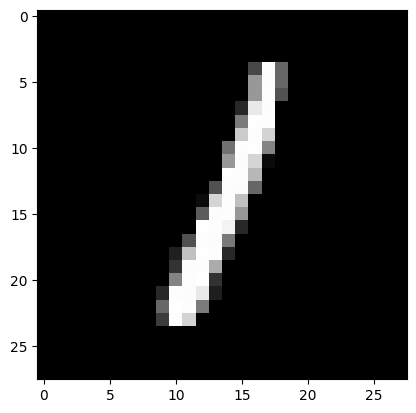

In [10]:
counter=np.random.randint(0, 100)
for i in range(counter, counter+12):
    test_prediction(i, W1, b1, W2, b2)